<a href="https://colab.research.google.com/github/rmorlowski/Generalized-Linear-Models/blob/master/Moneyball.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Moneyball

The deliverable is to analyze baseball team data from 1871-2006 to predict the number of wins in a 162-game regular season. This will be accomplished through exploratory data analysis and by generating regression models using different variable selection techniques including but not limited to forward, stepwise, and backward regression. From these techniques, the best model will be selected. The best model will then be further analyzed to determine if it is an adequate model to predict or if further analysis or data transformation is necessary.

Link to kaggle competition: [Kaggle](https://www.kaggle.com/c/moneyball-411-fall-2018)


**Note: ** #1 model in the class with RMSE = 9.30298

In [1]:
import pandas as pd 
import pandas_profiling
import numpy as np 
import statsmodels.api as sm
import statsmodels.formula.api as smf  
import matplotlib.pyplot as plt 
from scipy import stats
from scipy.stats.mstats import winsorize
from sklearn.metrics import mean_squared_error

get_ipython().magic(u'matplotlib inline')
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [0]:
get_ipython().magic(u'matplotlib inline')
#these are som options to control output on your screen 
pd.set_option('display.notebook_repr_html', False) 
pd.set_option('display.max_columns', 40) 
#pd.set_option('display.max_rows', 10) 
pd.set_option('display.width', 120)

In [3]:
# Import file to google colaboratory
from google.colab import files
# upload the train dataset
uploaded = files.upload()

Saving train.csv to train.csv


In [0]:
import io
#read in the datasets
train = pd.read_csv('train.csv')

In [5]:
# Import file to google colaboratory
# upload the test dataset
uploaded = files.upload()

Saving test.csv to test.csv


In [0]:
#read in the datasets
test = pd.read_csv('test.csv')

In [7]:
#you can also load a sas file moneyball_train = pd.read_sas('c:/sasuniversityedition/data/moneyball.sas7bdat')
train.head

<bound method NDFrame.head of       Unnamed: 0   INDEX  TARGET_WINS  TEAM_BATTING_H  TEAM_BATTING_2B  TEAM_BATTING_3B  TEAM_BATTING_HR  \
0              0     1.0         39.0          1445.0            194.0             39.0             13.0   
1              1     2.0         70.0          1339.0            219.0             22.0            190.0   
2              2     3.0         86.0          1377.0            232.0             35.0            137.0   
3              3     4.0         70.0          1387.0            209.0             38.0             96.0   
4              4     5.0         82.0          1297.0            186.0             27.0            102.0   
5              5     6.0         75.0          1279.0            200.0             36.0             92.0   
6              6     7.0         80.0          1244.0            179.0             54.0            122.0   
7              7     8.0         85.0          1273.0            171.0             37.0            115.0  

In [0]:
#A good step to take is to convert all variable names to lower case
train.columns = [s.lower() for s in train.columns]
test.columns = [s.lower() for s in test.columns]

In [9]:
print('')
print('----- Summary of Input Data -----')
print('')


----- Summary of Input Data -----



In [10]:
pandas_profiling.ProfileReport(train)

Number of variables,18
Number of observations,2276
Total Missing (%),8.5%
Total size in memory,320.1 KiB
Average record size in memory,144.0 B
Numeric,16
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,2


In [11]:
# show the object is a DataFrame
print('Object type: ', type(train))

Object type:  <class 'pandas.core.frame.DataFrame'>


In [12]:
# show number of observations in the DataFrame
print('Number of observations: ', len(train))

Number of observations:  2276


In [13]:
# show variable names
print('Variable names: ', train.columns)

Variable names:  Index(['unnamed: 0', 'index', 'target_wins', 'team_batting_h', 'team_batting_2b', 'team_batting_3b', 'team_batting_hr',
       'team_batting_bb', 'team_batting_so', 'team_baserun_sb', 'team_baserun_cs', 'team_batting_hbp',
       'team_pitching_h', 'team_pitching_hr', 'team_pitching_bb', 'team_pitching_so', 'team_fielding_e',
       'team_fielding_dp'],
      dtype='object')


In [14]:
# show descriptive statistics
print(train.describe())

        unnamed: 0        index  target_wins  team_batting_h  team_batting_2b  team_batting_3b  team_batting_hr  \
count  2276.000000  2276.000000  2276.000000     2276.000000      2276.000000      2276.000000      2276.000000   
mean   1137.500000  1268.463533    80.790861     1469.269772       241.246924        55.250000        99.612039   
std     657.168928   736.349040    15.752152      144.591195        46.801415        27.938557        60.546872   
min       0.000000     1.000000     0.000000      891.000000        69.000000         0.000000         0.000000   
25%     568.750000   630.750000    71.000000     1383.000000       208.000000        34.000000        42.000000   
50%    1137.500000  1270.500000    82.000000     1454.000000       238.000000        47.000000       102.000000   
75%    1706.250000  1915.500000    92.000000     1537.250000       273.000000        72.000000       147.000000   
max    2275.000000  2535.000000   146.000000     2554.000000       458.000000   

In [15]:
# show a portion of the beginning of the DataFrame
print(train.head())

   unnamed: 0  index  target_wins  team_batting_h  team_batting_2b  team_batting_3b  team_batting_hr  team_batting_bb  \
0           0    1.0         39.0          1445.0            194.0             39.0             13.0            143.0   
1           1    2.0         70.0          1339.0            219.0             22.0            190.0            685.0   
2           2    3.0         86.0          1377.0            232.0             35.0            137.0            602.0   
3           3    4.0         70.0          1387.0            209.0             38.0             96.0            451.0   
4           4    5.0         82.0          1297.0            186.0             27.0            102.0            472.0   

   team_batting_so  team_baserun_sb  team_baserun_cs  team_batting_hbp  team_pitching_h  team_pitching_hr  \
0            842.0              NaN              NaN               NaN           9364.0              84.0   
1           1075.0             37.0             28.0   

In [16]:
print('----train dataset column types information-------')
dtype_df = train.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

----train dataset column types information-------


  Column Type  Count
0       int64      1
1     float64     17

In [17]:
#Do we have missing values? 
datasetHasNan = False
if train.count().min() == train.shape[0] and test.count().min() == test.shape[0] :
    print('We do not need to worry about missing values.') 
else:
    datasetHasNan = True
    print('oops we have nan')

oops we have nan


In [18]:
#Check for missing data & list them 
if datasetHasNan == True:
    nas = pd.concat([train.isnull().sum(), test.isnull().sum()], axis=1, keys=['Train Dataset', 'Test Dataset']) 
    print('Nan in the data sets')
    print(nas[nas.sum(axis=1) > 0])

Nan in the data sets
                  Train Dataset  Test Dataset
team_baserun_cs             772          87.0
team_baserun_sb             131          13.0
team_batting_hbp           2085         240.0
team_batting_so             102          18.0
team_fielding_dp            286          31.0
team_pitching_so            102          18.0


In [0]:
# Drop team_batting_hbp... Too many missing values
train1 = train.drop(columns=['team_batting_hbp'])
test1 = test.drop(columns=['team_batting_hbp'])

In [20]:
# First lets see if any records contain very few wins.
train1[train1['target_wins'] < 3]

      unnamed: 0   index  target_wins  team_batting_h  team_batting_2b  team_batting_3b  team_batting_hr  \
1210        1210  1347.0          0.0           891.0            135.0              0.0              0.0   

      team_batting_bb  team_batting_so  team_baserun_sb  team_baserun_cs  team_pitching_h  team_pitching_hr  \
1210              0.0              0.0              0.0              0.0          24057.0               0.0   

      team_pitching_bb  team_pitching_so  team_fielding_e  team_fielding_dp  
1210               0.0               0.0           1890.0               NaN  

In [0]:
# We have one record that contains zero wins, this seems suspect for a 100+ game season, no matter how bad they are.
# Let's drop this record as I believe this data is invalid
train1 = train1[train1.target_wins > 0]

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0.5, 1.0, 'Distribution of Target Wins')

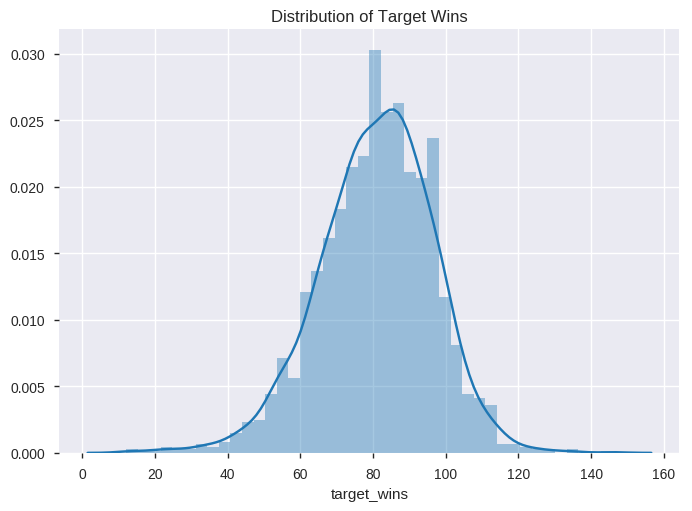

In [22]:
#Distribution Plot (Histogram of target wins)
sns.distplot(train1.target_wins).set_title('Distribution of Target Wins')
#Histogram confirms relatively normal distribution with a peak just over ~80 wins

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


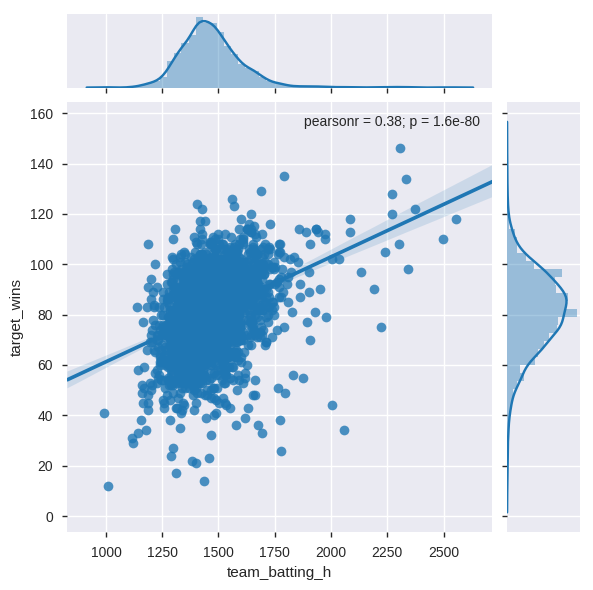

In [23]:
# Joint Distribution Plot team_batting_h
sns.jointplot(x='team_batting_h', y='target_wins', data=train1, kind="reg")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


Text(0.5, 1.0, 'Boxplot of Team Pitching SO')

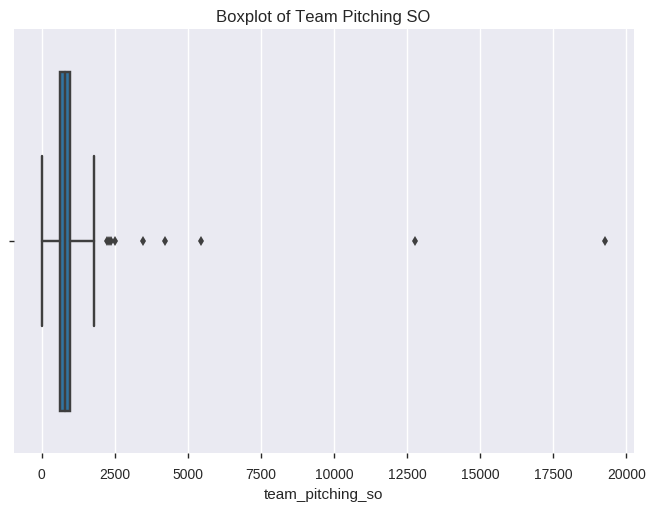

In [24]:
sns.boxplot(x=train1['team_pitching_so'], whis = 3.0).set_title('Boxplot of Team Pitching SO')

In [25]:
# Check the skewness and kurtosis of each variable
# Is skew close to zero 0?  Is kurtosis close to three 0.0?
print('team_batting_h Skew: {:.3f} | Kurtosis: {:.3f}'.format(  #use median
    train1.team_batting_h.skew(), train1.team_batting_h.kurtosis()))
print('team_batting_2b Skew: {:.3f} | Kurtosis: {:.3f}'.format(
    train1.team_batting_2b.skew(), train1.team_batting_2b.kurtosis()))
print('team_batting_3b Skew: {:.3f} | Kurtosis: {:.3f}'.format(
    train1.team_batting_3b.skew(), train1.team_batting_3b.kurtosis()))
print('team_batting_hr Skew: {:.3f} | Kurtosis: {:.3f}'.format(
    train1.team_batting_hr.skew(), train1.team_batting_hr.kurtosis()))
print('team_batting_bb Skew: {:.3f} | Kurtosis: {:.3f}'.format(
    train1.team_batting_bb.skew(), train1.team_batting_bb.kurtosis()))
print('team_batting_so Skew: {:.3f} | Kurtosis: {:.3f}'.format(
    train1.team_batting_so.skew(), train1.team_batting_so.kurtosis()))
print('team_baserun_sb Skew: {:.3f} | Kurtosis: {:.3f}'.format(
    train1.team_baserun_sb.skew(), train1.team_baserun_sb.kurtosis()))
print('team_baserun_cs Skew: {:.3f} | Kurtosis: {:.3f}'.format(
    train1.team_baserun_cs.skew(), train1.team_baserun_cs.kurtosis()))
print('team_pitching_h Skew: {:.3f} | Kurtosis: {:.3f}'.format(
    train1.team_pitching_h.skew(), train1.team_pitching_h.kurtosis()))
print('team_pitching_hr Skew: {:.3f} | Kurtosis: {:.3f}'.format(
    train1.team_pitching_hr.skew(), train1.team_pitching_hr.kurtosis()))
print('team_pitching_bb Skew: {:.3f} | Kurtosis: {:.3f}'.format(
    train1.team_pitching_bb.skew(), train1.team_pitching_bb.kurtosis()))
print('team_pitching_so Skew: {:.3f} | Kurtosis: {:.3f}'.format(
    train1.team_pitching_so.skew(), train1.team_pitching_so.kurtosis()))
print('team_fielding_e Skew: {:.3f} | Kurtosis: {:.3f}'.format(
    train1.team_fielding_e.skew(), train1.team_fielding_e.kurtosis()))
print('team_fielding_dp Skew: {:.3f} | Kurtosis: {:.3f}'.format(
    train1.team_fielding_dp.skew(), train1.team_fielding_dp.kurtosis()))

team_batting_h Skew: 1.613 | Kurtosis: 7.323
team_batting_2b Skew: 0.218 | Kurtosis: 0.011
team_batting_3b Skew: 1.114 | Kurtosis: 1.516
team_batting_hr Skew: 0.186 | Kurtosis: -0.961
team_batting_bb Skew: -1.013 | Kurtosis: 2.152
team_batting_so Skew: -0.292 | Kurtosis: -0.330
team_baserun_sb Skew: 1.977 | Kurtosis: 5.518
team_baserun_cs Skew: 1.994 | Kurtosis: 7.701
team_pitching_h Skew: 10.263 | Kurtosis: 145.758
team_pitching_hr Skew: 0.289 | Kurtosis: -0.601
team_pitching_bb Skew: 6.813 | Kurtosis: 98.115
team_pitching_so Skew: 22.233 | Kurtosis: 674.350
team_fielding_e Skew: 2.938 | Kurtosis: 10.454
team_fielding_dp Skew: -0.390 | Kurtosis: 0.188


In [0]:
# Flag missing variables
train1['miss_bso'] = train1.team_batting_so.isnull().astype(int)
train1['miss_bsb'] = train1.team_baserun_sb.isnull().astype(int)
train1['miss_bcs'] = train1.team_baserun_cs.isnull().astype(int)
train1['miss_pso'] = train1.team_pitching_so.isnull().astype(int)
train1['miss_fdp'] = train1.team_fielding_dp.isnull().astype(int)

# Flag missing variables
test1['miss_bso'] = test1.team_batting_so.isnull().astype(int)
test1['miss_bsb'] = test1.team_baserun_sb.isnull().astype(int)
test1['miss_bcs'] = test1.team_baserun_cs.isnull().astype(int)
test1['miss_pso'] = test1.team_pitching_so.isnull().astype(int)
test1['miss_fdp'] = test1.team_fielding_dp.isnull().astype(int)

In [27]:
# Trim extreme outliers from train data
#a = np.array(train1['team_pitching_so'].values.tolist())
#train1['team_pitching_so'] = np.where(a > (3 * np.mean(train1['team_pitching_so'])), round(3 * np.mean(train1['team_pitching_so']), 0), a).tolist()
#print('New team_pitching_so max values is: ' + str(train1['team_pitching_so'].max()))

# team_pitching_h trim extreme high outliers
#a = np.array(train1['team_fielding_e'].values.tolist())
#train1['team_fielding_e'] = np.where(a > (3 * np.mean(train1['team_fielding_e'])), round(3 * np.mean(train1['team_fielding_e']), 0), a).tolist()
#print('New team_fielding_e max values is: ' + str(train1['team_fielding_e'].max()))

# team_pitching_h trim extreme high outliers
a = np.array(train1['team_pitching_h'].values.tolist())
train1['team_pitching_h'] = np.where(a > (3.0 * np.mean(train1['team_pitching_h'])), round(3.0 * np.mean(train1['team_pitching_h']), 0), a).tolist()
print('New team_pitching_h max values is: ' + str(train1['team_pitching_h'].max()))

New team_pitching_h max values is: 5308.0


In [28]:
# Trim extreme outliers from test data
# team_pitching_so extreme high outliers
#a = np.array(test1['team_pitching_so'].values.tolist())
#test1['team_pitching_so'] = np.where(a > (3 * np.mean(train1['team_pitching_so'])), round(3 * np.mean(train1['team_pitching_so']), 0), a).tolist()
#print('New team_pitching_so max values is: ' + str(test1['team_pitching_so'].max()))

# team_fielding_e trim extreme high outliers
#a = np.array(test1['team_fielding_e'].values.tolist())
#test1['team_fielding_e'] = np.where(a > (3 * np.mean(train1['team_fielding_e'])), round(3 * np.mean(train1['team_fielding_e']), 0), a).tolist()
#print('New team_fielding_e max values is: ' + str(test1['team_fielding_e'].max()))

# team_pitching_h trim extreme high outliers
a = np.array(test1['team_pitching_h'].values.tolist())
test1['team_pitching_h'] = np.where(a > (3.0 * np.mean(train1['team_pitching_h'])), round(3.0 * np.mean(test1['team_pitching_h']), 0), a).tolist()
print('New team_pitching_h max values is: ' + str(test1['team_pitching_h'].max()))

New team_pitching_h max values is: 5440.0


In [29]:
print('----DATA CLEANSING-------')
#Note the missing values are recorded as NaN, we need to replace these with something (median? or your choice)
#start by converting all NaN values to 0
train1=train1.fillna(0)

#print(train1)
# team_batting_h = median (skewed)
m0 = np.median(train1.team_batting_h[train1.team_batting_h>0])
train1 = train1.replace({'team_batting_h': {0: m0}})
pct1, pct99 = train1.team_batting_h.quantile([0.01,0.99])
train1.team_batting_h.clip(lower = pct1, upper = pct99, inplace = True)
# team_batting_3b = median (skewed)
m1 = np.median(train1.team_batting_3b[train1.team_batting_3b>0])
train1 = train1.replace({'team_batting_3b': {0: m1}})
pct1, pct99 = train1.team_batting_3b.quantile([0.01,0.99])
train1.team_batting_3b.clip(lower = pct1, upper = pct99, inplace = True)
# team_batting_hr = mean
m2 = np.mean(train1.team_batting_hr[train1.team_batting_hr>0])
train1 = train1.replace({'team_batting_hr': {0: m2}})
pct1, pct99 = train1.team_batting_hr.quantile([0.01,0.99])
train1.team_batting_hr.clip(lower = pct1, upper = pct99, inplace = True)
# team_batting_bb = median (skewed)
m3 = np.median(train1.team_batting_bb[train1.team_batting_bb>0])
train1 = train1.replace({'team_batting_bb': {0: m3}})
pct1, pct99 = train1.team_batting_bb.quantile([0.01,0.99])
train1.team_batting_bb.clip(lower = pct1, upper = pct99, inplace = True)
#team_batting_so
m4 = np.mean(train1.team_batting_so[train1.team_batting_so>0])
train1 = train1.replace({'team_batting_so': {0: m4}})
pct1, pct99 = train1.team_batting_so.quantile([0.01,0.99])
train1.team_batting_so.clip(lower = pct1, upper = pct99, inplace = True)
# team_baserun_sb = median (skewed)
m5 = np.median(train1.team_baserun_sb[train1.team_baserun_sb>0])
train1 = train1.replace({'team_baserun_sb': {0: m5}})
pct1, pct99 = train1.team_baserun_sb.quantile([0.01,0.99])
train1.team_baserun_sb.clip(lower = pct1, upper = pct99, inplace = True)
# team_baserun_cs = median (skewed)
m6 = np.median(train1.team_baserun_cs[train1.team_baserun_cs>0])
train1 = train1.replace({'team_baserun_cs': {0: m6}})
pct1, pct99 = train1.team_baserun_cs.quantile([0.01,0.99])
train1.team_baserun_cs.clip(lower = pct1, upper = pct99, inplace = True)
# team_pitching_hr = mean
m7 = np.mean(train1.team_pitching_hr[train1.team_pitching_hr>0])
train1 = train1.replace({'team_pitching_hr': {0: m7}})
pct1, pct99 = train1.team_pitching_hr.quantile([0.01,0.99])
train1.team_pitching_hr.clip(lower = pct1, upper = pct99, inplace = True)
# team_pitching_bb = median (skewed)
m8 = np.median(train1.team_pitching_bb[train1.team_pitching_bb>0])
train1 = train1.replace({'team_pitching_bb': {0: m8}})
pct1, pct99 = train1.team_pitching_bb.quantile([0.01,0.99])
train1.team_pitching_bb.clip(lower = pct1, upper = pct99, inplace = True)
# team_pitching_so = median (skewed)
m9 = np.median(train1.team_pitching_so[train1.team_pitching_so>0])
train1 = train1.replace({'team_pitching_so': {0: m9}})
pct1, pct99 = train1.team_pitching_so.quantile([0.01,0.99])
train1.team_pitching_so.clip(lower = pct1, upper = pct99, inplace = True)
# team_fielding_dp = mean
m10 = np.mean(train1.team_fielding_dp[train1.team_fielding_dp>0])
train1 = train1.replace({'team_fielding_dp': {0: m10}})
pct1, pct99 = train1.team_fielding_dp.quantile([0.01,0.99])
train1.team_fielding_dp.clip(lower = pct1, upper = pct99, inplace = True)
# team_fielding_e = median
m11 = np.median(train1.team_fielding_e[train1.team_fielding_e>0])
train1 = train1.replace({'team_fielding_e': {0: m11}})
pct1, pct99 = train1.team_fielding_e.quantile([0.01,0.99])
train1.team_fielding_e.clip(lower = pct1, upper = pct99, inplace = True)
# team_pitching_h = median
m12 = np.median(train1.team_pitching_h[train1.team_pitching_h>0])
train1 = train1.replace({'team_pitching_h': {0: m12}})
pct1, pct99 = train1.team_pitching_h.quantile([0.01,0.99])
train1.team_pitching_h.clip(lower = pct1, upper = pct99, inplace = True)
# team_batting_2b = mean
#m13 = np.mean(train1.team_batting_2b[train1.team_batting_2b>0])
#train1 = train1.replace({'team_batting_2b': {0: m13}})
#pct1, pct99 = train1.team_batting_2b.quantile([0.01,0.99])
#train1.team_batting_2b.clip(lower = pct1, upper = pct99, inplace = True)

print(train1.describe())
#Make sure whatever you do to the train1ing data you also do to the test data otherwise your model will not score properly
test1=test1.fillna(0)

test1=test1.replace({'team_batting_h': {0: m0}})
pct1, pct99 = train1.team_batting_h.quantile([0.01,0.99])
test1.team_batting_h.clip(lower = pct1, upper = pct99, inplace = True)
test1=test1.replace({'team_batting_3b': {0: m1}})
pct1, pct99 = train1.team_batting_3b.quantile([0.01,0.99])
test1.team_batting_3b.clip(lower = pct1, upper = pct99, inplace = True)
test1=test1.replace({'team_batting_hr': {0: m2}})
pct1, pct99 = train1.team_batting_hr.quantile([0.01,0.99])
test1.team_batting_hr.clip(lower = pct1, upper = pct99, inplace = True)
test1=test1.replace({'team_batting_bb': {0: m3}})
pct1, pct99 = train1.team_batting_bb.quantile([0.01,0.99])
test1.team_batting_bb.clip(lower = pct1, upper = pct99, inplace = True)
test1=test1.replace({'team_batting_so': {0: m4}})
pct1, pct99 = train1.team_batting_so.quantile([0.01,0.99])
test1.team_batting_so.clip(lower = pct1, upper = pct99, inplace = True)
test1=test1.replace({'team_baserun_sb': {0: m5}})
pct1, pct99 = train1.team_baserun_sb.quantile([0.01,0.99])
test1.team_baserun_sb.clip(lower = pct1, upper = pct99, inplace = True)
test1=test1.replace({'team_baserun_cs': {0: m6}})
pct1, pct99 = train1.team_baserun_cs.quantile([0.01,0.99])
test1.team_baserun_cs.clip(lower = pct1, upper = pct99, inplace = True)
test1=test1.replace({'team_pitching_hr': {0: m7}})
pct1, pct99 = train1.team_pitching_hr.quantile([0.01,0.99])
test1.team_pitching_hr.clip(lower = pct1, upper = pct99, inplace = True)
test1=test1.replace({'team_pitching_bb': {0: m8}})
pct1, pct99 = train1.team_pitching_bb.quantile([0.01,0.99])
test1.team_pitching_bb.clip(lower = pct1, upper = pct99, inplace = True)
test1=test1.replace({'team_pitching_so': {0: m9}})
pct1, pct99 = train1.team_pitching_so.quantile([0.01,0.99])
test1.team_pitching_so.clip(lower = pct1, upper = pct99, inplace = True)
test1=test1.replace({'team_fielding_dp': {0: m10}})
pct1, pct99 = train1.team_fielding_dp.quantile([0.01,0.99])
test1.team_fielding_dp.clip(lower = pct1, upper = pct99, inplace = True)
test1=test1.replace({'team_fielding_e': {0: m11}})
pct1, pct99 = train1.team_fielding_e.quantile([0.01,0.99])
test1.team_fielding_e.clip(lower = pct1, upper = pct99, inplace = True)
test1=test1.replace({'team_pitching_h': {0: m12}})
pct1, pct99 = train1.team_pitching_h.quantile([0.01,0.99])
test1.team_pitching_h.clip(lower = pct1, upper = pct99, inplace = True)

#test1=test1.replace({'team_batting_2b': {0: m13}})
#pct1, pct99 = train1.team_batting_2b.quantile([0.01,0.99])
#test1.team_batting_2b.clip(lower = pct1, upper = pct99, inplace = True)

print(train1.describe())

----DATA CLEANSING-------
        unnamed: 0        index  target_wins  team_batting_h  team_batting_2b  team_batting_3b  team_batting_hr  \
count  2275.000000  2275.000000  2275.000000     2275.000000      2275.000000      2275.000000      2275.000000   
mean   1137.468132  1268.429011    80.826374     1467.585890       241.293626        55.076475       100.217064   
std     657.311649   736.509087    15.664221      131.673122        46.758628        26.945098        59.800393   
min       0.000000     1.000000    12.000000     1195.740000        69.000000        17.000000         7.000000   
25%     568.500000   630.500000    71.000000     1383.000000       208.000000        34.000000        42.500000   
50%    1137.000000  1270.000000    82.000000     1454.000000       238.000000        47.000000       102.000000   
75%    1706.500000  1916.000000    92.000000     1537.500000       273.000000        72.000000       147.000000   
max    2275.000000  2535.000000   146.000000     1945.

In [0]:
#CHECK CLEAN DATA
#pandas_profiling.ProfileReport(train1)

In [31]:
# Add New Variables to Train

# Singles - team_batting_1B
train1['team_batting_1b'] = train1.team_batting_h - train1.team_batting_2b - train1.team_batting_3b - train1.team_batting_hr
# Total Bases - team_total_b
train1['team_total_b'] = train1.team_batting_1b + (2*train1.team_batting_2b) + (3*train1.team_batting_3b) + (4*train1.team_batting_hr) + train1.team_batting_bb + train1.team_baserun_sb - train1.team_baserun_cs
# Pitching Strike Outs Per Walk - team_pitching_sobb
train1['team_pitching_sobb'] = train1.team_pitching_so / train1.team_pitching_bb
# Stolen Base Percentage - team_baserun_sbcs
train1['team_baserun_sbcs'] = train1.team_baserun_sb / train1.team_baserun_cs
print(train1.describe())
# Extra base hits - team_batting_exh
train1['team_batting_exh'] = train1.team_batting_h - train1.team_batting_1b
print(train1.describe())

        unnamed: 0        index  target_wins  team_batting_h  team_batting_2b  team_batting_3b  team_batting_hr  \
count  2275.000000  2275.000000  2275.000000     2275.000000      2275.000000      2275.000000      2275.000000   
mean   1137.468132  1268.429011    80.826374     1467.585890       241.293626        55.076475       100.217064   
std     657.311649   736.509087    15.664221      131.673122        46.758628        26.945098        59.800393   
min       0.000000     1.000000    12.000000     1195.740000        69.000000        17.000000         7.000000   
25%     568.500000   630.500000    71.000000     1383.000000       208.000000        34.000000        42.500000   
50%    1137.000000  1270.000000    82.000000     1454.000000       238.000000        47.000000       102.000000   
75%    1706.500000  1916.000000    92.000000     1537.500000       273.000000        72.000000       147.000000   
max    2275.000000  2535.000000   146.000000     1945.560000       458.000000   

In [0]:
#Add New Variables to Test

# Singles - team_batting_1B
test1['team_batting_1b'] = test1.team_batting_h - test1.team_batting_2b - test1.team_batting_3b - test1.team_batting_hr
# Total Bases - team_total_b
test1['team_total_b'] = test1.team_batting_1b + (2*test1.team_batting_2b) + (3*test1.team_batting_3b) + (4*test1.team_batting_hr) + test1.team_batting_bb + test1.team_baserun_sb - test1.team_baserun_cs
# Pitching Strike Outs Per Walk - team_pitcing_sobb
test1['team_pitching_sobb'] = test1.team_pitching_so / test1.team_pitching_bb
# Stolen Base Percentage - team_baserun_sbcs
test1['team_baserun_sbcs'] = test1.team_baserun_sb / test1.team_baserun_cs
# Extra base hits - team_batting_exh
test1['team_batting_exh'] = test1.team_batting_h - test1.team_batting_1b

unnamed: 0                AxesSubplot(0.125,0.77;0.0945122x0.11)
index                  AxesSubplot(0.238415,0.77;0.0945122x0.11)
target_wins            AxesSubplot(0.351829,0.77;0.0945122x0.11)
team_batting_h         AxesSubplot(0.465244,0.77;0.0945122x0.11)
team_batting_2b        AxesSubplot(0.578659,0.77;0.0945122x0.11)
team_batting_3b        AxesSubplot(0.692073,0.77;0.0945122x0.11)
team_batting_hr        AxesSubplot(0.805488,0.77;0.0945122x0.11)
team_batting_bb          AxesSubplot(0.125,0.638;0.0945122x0.11)
team_batting_so       AxesSubplot(0.238415,0.638;0.0945122x0.11)
team_baserun_sb       AxesSubplot(0.351829,0.638;0.0945122x0.11)
team_baserun_cs       AxesSubplot(0.465244,0.638;0.0945122x0.11)
team_pitching_h       AxesSubplot(0.578659,0.638;0.0945122x0.11)
team_pitching_hr      AxesSubplot(0.692073,0.638;0.0945122x0.11)
team_pitching_bb      AxesSubplot(0.805488,0.638;0.0945122x0.11)
team_pitching_so         AxesSubplot(0.125,0.506;0.0945122x0.11)
team_fielding_e       Axe

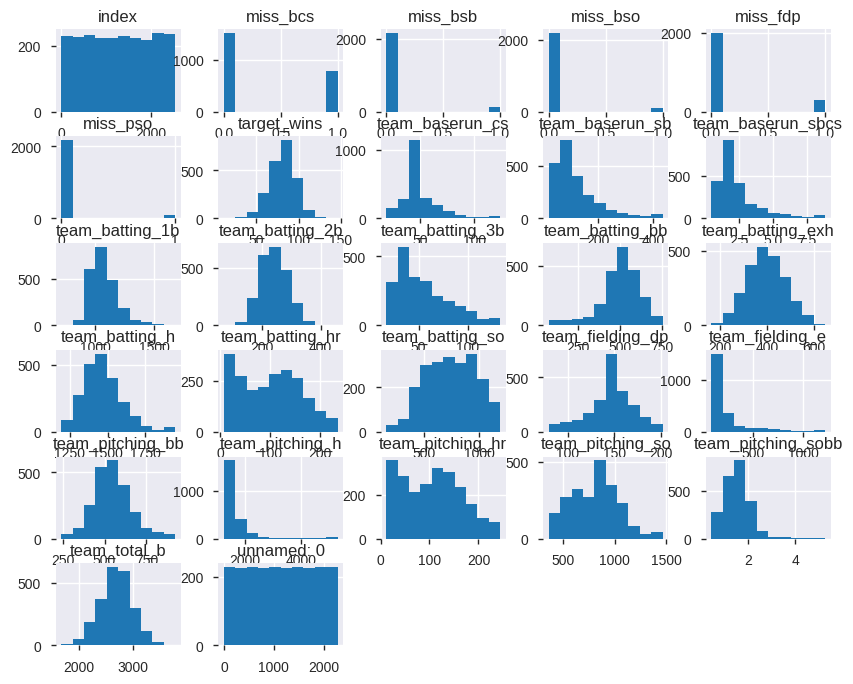

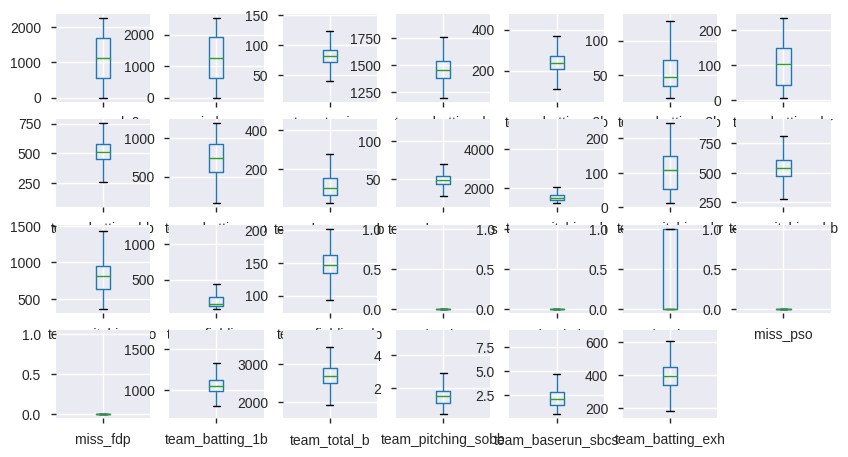

In [33]:
#///Do some EDA///;
#Some quick plots of the data
train1.hist(figsize=(10,8))
train1.plot(kind= 'box' , subplots=True, layout=(6,7), sharex=False, sharey=False, figsize=(10,8))

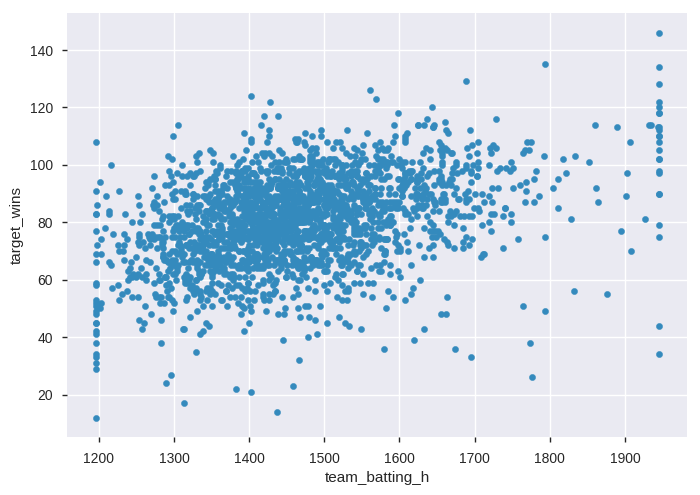

In [35]:
#Just in case there are some variables that are highly correlated look at some scatter plots
train1.plot.scatter(y='target_wins', x='team_batting_h', s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, 
linewidths=None, verts=None, edgecolors=None )
#to save your plot as a jpeg file for a report use the following code
#make sure you execute the plot and the savefig together

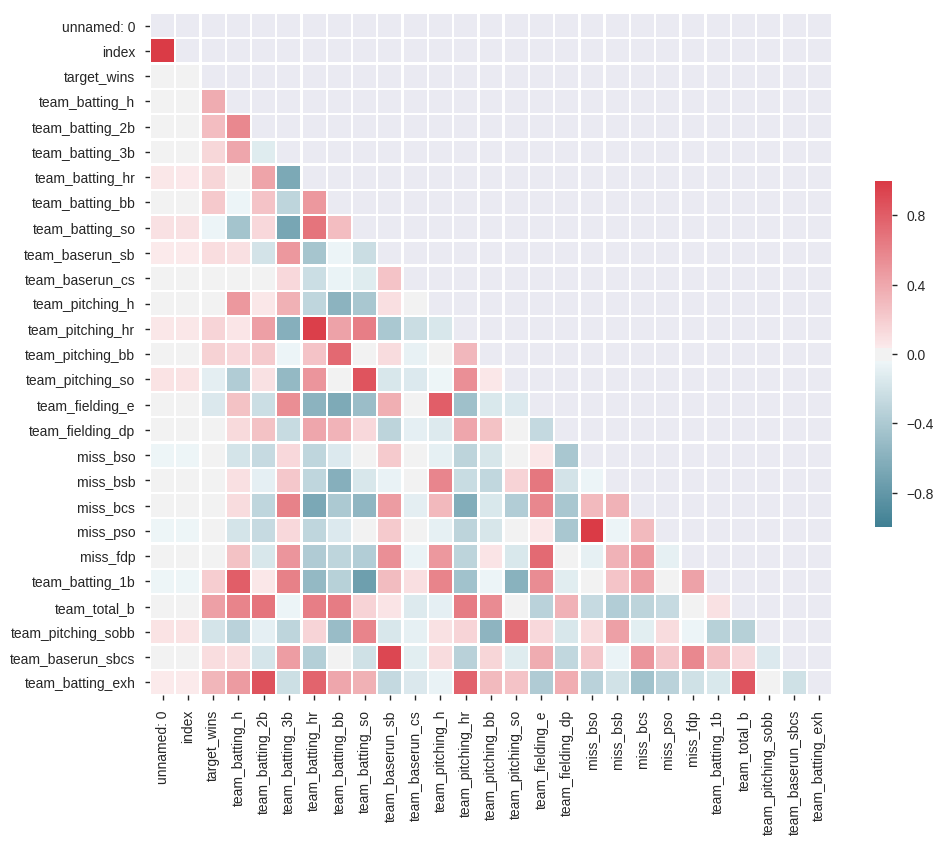

In [36]:
#Create a heatmap to check for correlated variables
# Compute the correlation matrix
corr = train1.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
        square=True, linewidths=1, xticklabels = True, yticklabels = True, cbar_kws={"shrink": .5})

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


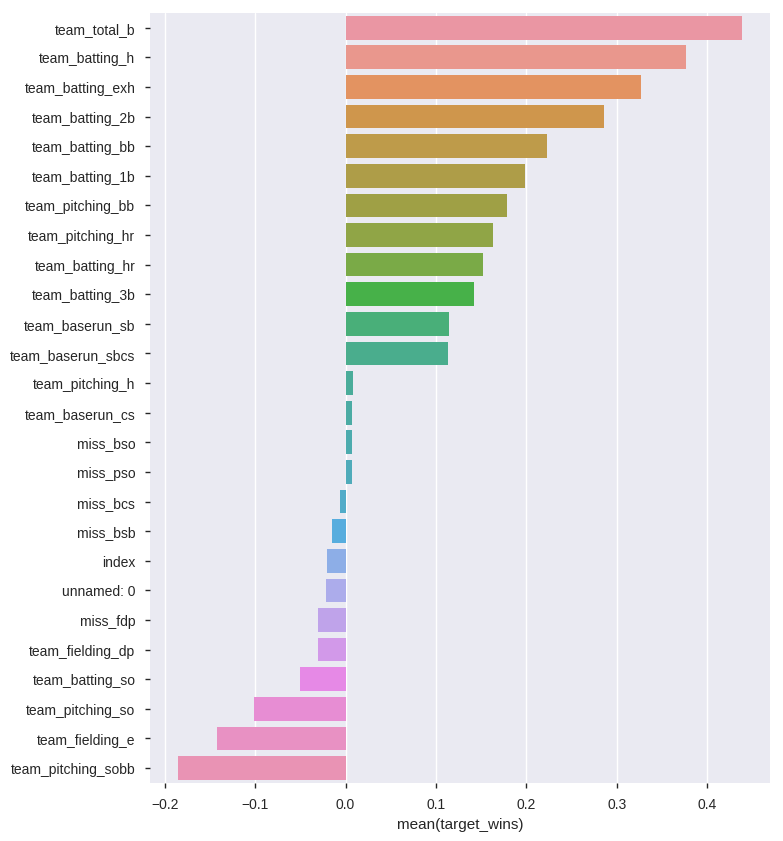

In [37]:
# Feature sorted by correlation to target wins, from positive to negative
corr = corr.sort_values('target_wins', ascending=False)
plt.figure(figsize=(8,10))
sns.barplot( corr.target_wins[1:], corr.index[1:], orient='h')
plt.show()

In [38]:
# Check the skewness of the target variable
print('Skew: {:.3f} | Kurtosis: {:.3f}'.format(
    train1.target_wins.skew(), train1.target_wins.kurtosis()))

Skew: -0.353 | Kurtosis: 0.820


In [0]:
# log transform variables
train1["log_batting_h"] = train1['team_batting_h'].apply(np.log)
train1["log_batting_2b"] = train1['team_batting_2b'].apply(np.log)
train1["log_batting_3b"] = train1['team_batting_3b'].apply(np.log)
train1["log_batting_bb"] = train1['team_batting_bb'].apply(np.log)
train1["log_batting_so"] = train1['team_batting_so'].apply(np.log)
train1["log_baserun_sb"] = train1['team_baserun_sb'].apply(np.log)
train1["log_baserun_cs"] = train1['team_baserun_cs'].apply(np.log)
train1["log_pitching_h"] = train1['team_pitching_h'].apply(np.log)
train1["log_pitching_hr"] = train1['team_pitching_hr'].apply(np.log)
train1["log_batting_hr"] = train1['team_batting_hr'].apply(np.log)
train1["log_pitching_bb"] = train1['team_pitching_bb'].apply(np.log)
train1["log_pitching_so"] = train1['team_pitching_so'].apply(np.log)
train1["log_fielding_e"] = train1['team_fielding_e'].apply(np.log)
train1["log_fielding_dp"] = train1['team_fielding_dp'].apply(np.log)
train1["log_batting_1b"] = train1['team_batting_1b'].apply(np.log)
train1["log_total_b"] = train1['team_total_b'].apply(np.log)
train1["log_batting_exh"] = train1['team_batting_exh'].apply(np.log)

In [0]:
# log transform test variables
test1["log_batting_h"] = test1['team_batting_h'].apply(np.log)
test1["log_batting_2b"] = test1['team_batting_2b'].apply(np.log)
test1["log_batting_3b"] = test1['team_batting_3b'].apply(np.log)
test1["log_batting_bb"] = test1['team_batting_bb'].apply(np.log)
test1["log_batting_so"] = test1['team_batting_so'].apply(np.log)
test1["log_baserun_sb"] = test1['team_baserun_sb'].apply(np.log)
test1["log_baserun_cs"] = test1['team_baserun_cs'].apply(np.log)
test1["log_pitching_h"] = test1['team_pitching_h'].apply(np.log)
test1["log_pitching_hr"] = test1['team_pitching_hr'].apply(np.log)
test1["log_batting_hr"] = test1['team_batting_hr'].apply(np.log)
test1["log_pitching_bb"] = test1['team_pitching_bb'].apply(np.log)
test1["log_pitching_so"] = test1['team_pitching_so'].apply(np.log)
test1["log_fielding_e"] = test1['team_fielding_e'].apply(np.log)
test1["log_fielding_dp"] = test1['team_fielding_dp'].apply(np.log)
test1["log_batting_1b"] = test1['team_batting_1b'].apply(np.log)
test1["log_total_b"] = test1['team_total_b'].apply(np.log)
test1["log_batting_exh"] = test1['team_batting_exh'].apply(np.log)

In [41]:
train1.describe()

        unnamed: 0        index  target_wins  team_batting_h  team_batting_2b  team_batting_3b  team_batting_hr  \
count  2275.000000  2275.000000  2275.000000     2275.000000      2275.000000      2275.000000      2275.000000   
mean   1137.468132  1268.429011    80.826374     1467.585890       241.293626        55.076475       100.217064   
std     657.311649   736.509087    15.664221      131.673122        46.758628        26.945098        59.800393   
min       0.000000     1.000000    12.000000     1195.740000        69.000000        17.000000         7.000000   
25%     568.500000   630.500000    71.000000     1383.000000       208.000000        34.000000        42.500000   
50%    1137.000000  1270.000000    82.000000     1454.000000       238.000000        47.000000       102.000000   
75%    1706.500000  1916.000000    92.000000     1537.500000       273.000000        72.000000       147.000000   
max    2275.000000  2535.000000   146.000000     1945.560000       458.000000   

In [42]:
#Check for missing data one last time...
if datasetHasNan == True:
    nas = pd.concat([train1.isnull().sum(), test1.isnull().sum()], axis=1, keys=['Train1 Dataset', 'Test1 Dataset']) 
    print('Nan in the data sets')
    print(nas[nas.sum(axis=1) > 0])

Nan in the data sets
Empty DataFrame
Columns: [Train1 Dataset, Test1 Dataset]
Index: []


In [0]:
log_y = train1['target_wins'].apply(np.log)

In [0]:
#CHECK TRANSFORMED DATA
#pandas_profiling.ProfileReport(train1)

In [45]:
# Model 1: Shell code model
regres1 = smf.ols('target_wins ~ team_batting_h' , data=train1)  
result = regres1.fit()  
print (result.summary())
print (result.conf_int())
#dir(result) lists other print options

                            OLS Regression Results                            
Dep. Variable:            target_wins   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     374.7
Date:                Fri, 22 Feb 2019   Prob (F-statistic):           2.13e-77
Time:                        21:46:59   Log-Likelihood:                -9313.4
No. Observations:                2275   AIC:                         1.863e+04
Df Residuals:                    2273   BIC:                         1.864e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         15.1468      3.407      4.

In [46]:
# Model 2: Multiple Regression Model #
regres2 = smf.ols('target_wins ~ team_batting_h + team_batting_2b + log_batting_3b + team_batting_bb + team_fielding_e + team_pitching_bb + log_pitching_h', data=train1)  
result2 = regres2.fit()  
print (result2.summary())
print (result2.conf_int())
#dir(result) lists other print option

                            OLS Regression Results                            
Dep. Variable:            target_wins   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     101.3
Date:                Fri, 22 Feb 2019   Prob (F-statistic):          4.07e-129
Time:                        21:46:59   Log-Likelihood:                -9177.4
No. Observations:                2275   AIC:                         1.837e+04
Df Residuals:                    2267   BIC:                         1.842e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -179.8827     27.279  

In [47]:
# Model 3: log transformed model with/ Flag Variables
#Take a look at a possible model
regres1 = smf.ols('target_wins ~ log_batting_h + log_batting_1b +log_batting_2b + log_batting_3b + log_batting_hr + log_total_b +log_batting_bb + log_batting_so + log_baserun_sb + log_baserun_cs + log_fielding_e + log_fielding_dp + log_pitching_bb + log_pitching_h + log_pitching_hr + log_pitching_so + miss_bso + miss_bsb + miss_bcs + miss_pso + miss_fdp', data=train1)  
result = regres1.fit()  
print (result.summary())
print (result.conf_int())
#dir(result) lists other print options

                            OLS Regression Results                            
Dep. Variable:            target_wins   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     79.88
Date:                Fri, 22 Feb 2019   Prob (F-statistic):          1.84e-244
Time:                        21:46:59   Log-Likelihood:                -8877.5
No. Observations:                2275   AIC:                         1.780e+04
Df Residuals:                    2254   BIC:                         1.792e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -348.7043     43.287     

In [48]:
# Model 4: log transformed model with/ Other Variables
#Take a look at a possible model
regres4 = smf.ols('target_wins ~ log_batting_h + log_batting_1b + log_batting_2b + log_batting_3b + log_batting_hr + log_total_b +log_batting_bb + log_batting_so + log_baserun_sb + log_baserun_cs + log_fielding_e + log_fielding_dp + log_pitching_bb + log_pitching_h + log_pitching_hr + log_pitching_so + miss_bso + miss_bsb + miss_bcs + miss_pso + miss_fdp + team_pitching_sobb + team_baserun_sbcs + log_batting_exh', data=train1)  
result4 = regres4.fit()  
print (result4.summary())
print (result4.conf_int())
#dir(result) lists other print options

                            OLS Regression Results                            
Dep. Variable:            target_wins   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     71.19
Date:                Fri, 22 Feb 2019   Prob (F-statistic):          7.37e-247
Time:                        21:46:59   Log-Likelihood:                -8865.2
No. Observations:                2275   AIC:                         1.778e+04
Df Residuals:                    2251   BIC:                         1.792e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -299.1073     47

In [49]:
predictions = result.predict(test1)
print(predictions)

0      59.149427
1      63.561401
2      69.219929
3      85.067788
4      80.896202
5      81.834398
6      81.629196
7      61.780535
8      69.405021
9      69.317681
10     65.158373
11     80.730122
12     81.774266
13     79.818322
14     84.994388
15     73.073580
16     68.193318
17     78.423818
18     70.157171
19     85.413479
20     86.138432
21     84.296955
22     82.309707
23     69.297657
24     81.995960
25     86.864719
26     53.948182
27     65.764552
28     83.926325
29     66.232761
         ...    
229    83.351218
230    91.023450
231    89.764689
232    86.527049
233    85.534338
234    76.753603
235    74.000488
236    75.735829
237    81.977848
238    86.167416
239    65.088903
240    87.079519
241    96.385206
242    87.067186
243    83.677974
244    55.666991
245    82.696014
246    76.573959
247    82.904351
248    73.591945
249    87.660938
250    80.335519
251    75.163915
252    91.371822
253    45.416247
254    64.307623
255    76.528607
256    85.8108

In [0]:
#Convert the array predictions to a data frame then merge with the index for the test data to create your file
d = {'p_target_wins': predictions}
df1 = test[['index']]
df2=pd.DataFrame(data=d)
your_file = pd.concat([df1,df2],axis = 1, join_axes=[df1.index])
#Submit your file as csv using the following code to save on your computer
#your_file.to_csv('/Users/rmorlows/Desktop/MSDS411/Assignment 01/hw01_predictions.csv')

In [52]:
#your_file
dtype_your_file = your_file.dtypes.reset_index()
dtype_your_file.columns = ["Count", "Column Type"]
dtype_your_file.groupby("Column Type").aggregate('count').reset_index()

  Column Type  Count
0     float64      2

In [53]:
# Check for missing data in my predictions
if datasetHasNan == True:
    nas = pd.concat([your_file.isnull().sum()], axis=1, keys=['predictions']) 
    print('Nan in the data sets')
    print(nas[nas.sum(axis=1) > 0])

Nan in the data sets
Empty DataFrame
Columns: [predictions]
Index: []


In [54]:
# What's the min and max prediction for wins? (Expect ~ 54 Losses)
print(your_file.p_target_wins.min())
print(your_file.p_target_wins.max())

# Do these numbers intuitively reflect a 162 game season?

20.875765080609877
108.09333035137047


In [55]:
# RMSE Model 3 - Different than Kaggle Scoring
y = train1['target_wins']
y_pred = result.fittedvalues 
print(np.sqrt(mean_squared_error(y, y_pred)))

11.980505275259317


**Quote from Tommy Lasorda -- **
*“No matter how good you are, you're going to lose one-third of your games. No matter how bad you are you're going to win one-third of your games. It's the other third that makes the difference.”*

#### Conclusion

Several models were developed and tested to predict the number of wins for a baseball team during a 162-game season. The best multiple regression model was derived using the full model with log transformed variables, new variables (singles and total bases), and flag variables as predictors of target wins. Other models were tested that resulted in higher R-squared values, but the model selected is more parsimonious with a lower F-stat and AIC. Although there were no problems detected with the various regression models, the selected model did have sign issues where variable coefficients were different than what was expected in the data dictionary. It may be advantageous to consult a baseball expert before including or eliminating these variables from the model. Additionally, through EDA we uncovered many skewed variables that benefited from data transformations. These issues require further investigation, but are beyond the scope of this report.